In [1]:
%matplotlib inline

# modules necessary for plotting
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("whitegrid")

import pandas as pd
import numpy as np


filename = "https://raw.githubusercontent.com/terben/Programming_in_Python_BCGS_Summer_2022/master/lecture_04/data/Orcaflex%20Simulation%2C%2015%20MW%20wind%20turbine.csv"
data = pd.read_csv(filename, delimiter=';') # Delimiter tells how the rows are separated
data # print a preview of the data

#Format the table
data = pd.read_csv(filename, delimiter = ';', header=2, skiprows=[3])
data

#We make arrays out of the different columns.
t = np.array(data['Time']) 
seaSurface = np.array(data['Sea surface'])
tilt = np.array(data['Tilt'])
mooring = np.array(data['Mooring force'])
nacAcc = np.array(data['Nac. acc.'])
towerMom = np.array(data['Tower mom.'])
windSpeed = np.array(data['Wind speed'])


Text(0, 0.5, 'Sea level (m)')

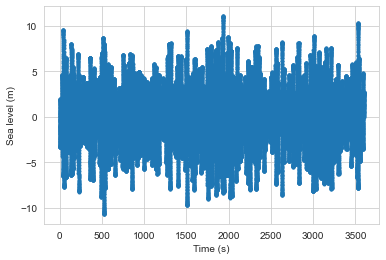

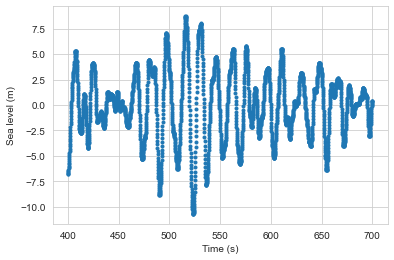

In [2]:
# We plot the sea level as a function of the time
plt.plot(t,seaSurface,'.',linewidth=0.8)
plt.xlabel('Time (s)')
plt.ylabel('Sea level (m)')

#This looks a bit messy!

# Let's consider a small time window of 5 minutes = 300 s.
plt.figure()
plt.plot(t[(t>400) & (t<700)], seaSurface[(t>400) & (t<700)],'.',linewidth=7.0)
plt.xlabel('Time (s)')
plt.ylabel('Sea level (m)')


In [3]:
#maximal height above normal sea level
maxHeight = np.max(seaSurface)
print(maxHeight)

#maximal height below normal sea level
minHeight = np.min(seaSurface)
print(minHeight)

maxArg = np.argmax(seaSurface)
#print(maxArg)

minArg = np.argmin(seaSurface)
#print(minArg)

tdiff = t[maxArg] - t[minArg]
print(tdiff)

#maximal wind speed in km/h
maxWindSpeed = np.max(windSpeed)
print(maxWindSpeed)

#biggest moment experienced by the tower
maxMoment = np.max(np.abs(towerMom))
print(maxMoment)



11.05
-10.69
1411.5
70.31
1327809.46


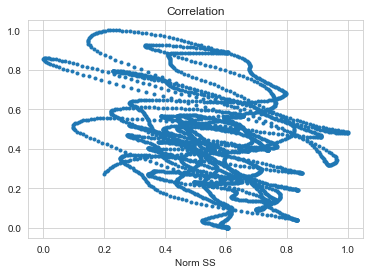

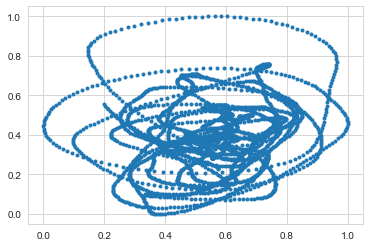

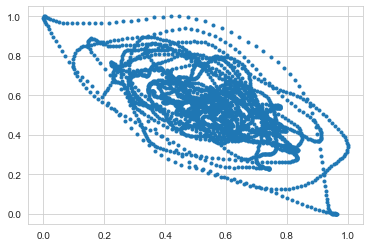

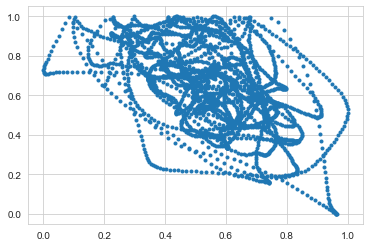

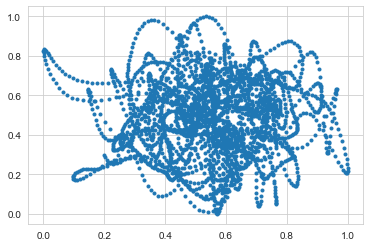

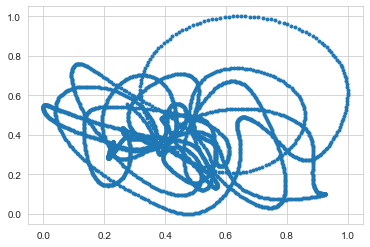

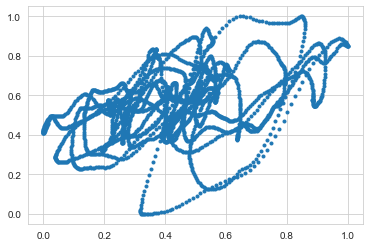

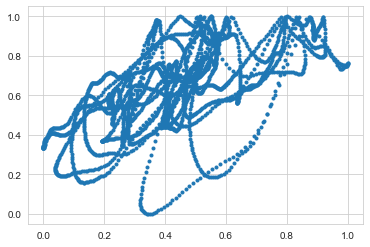

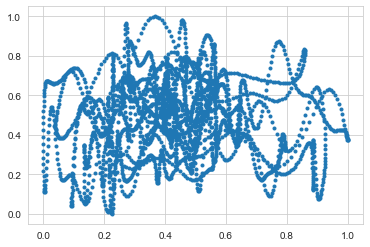

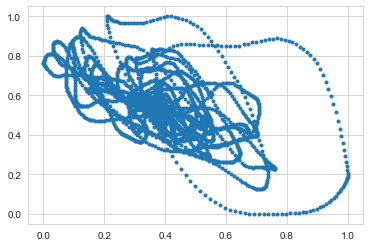

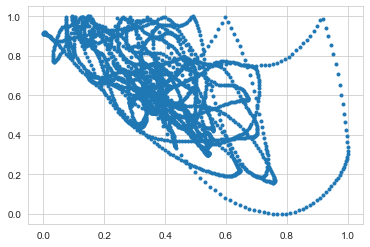

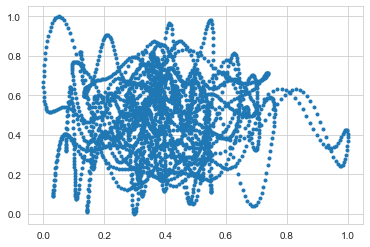

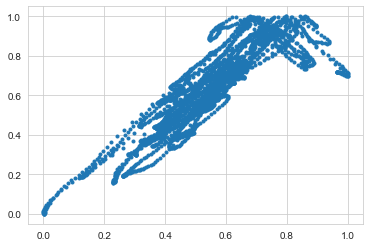

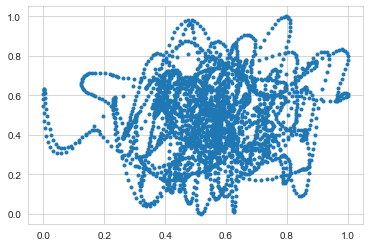

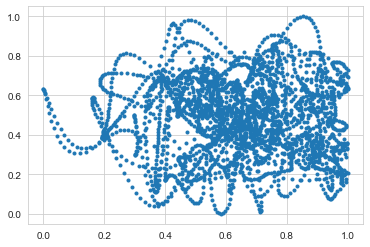

In [4]:
def sliceArray(array, t, mintime, maxtime):
    # To slice in time we select only datapoints satisfying the greater than 
    # and smaller than requirements.
    slicedArray = array[(t>mintime) & (t<= maxtime)]
    return slicedArray

def normalizeArray(array):
    # To normalize an array, we subtract the minimum value 
    # and divide by the maximum value
    normalizedArray = (array-min(array))/max(array-min(array))
    return normalizedArray

normseasurface = normalizeArray(sliceArray(seaSurface, t, 400, 700))
normtilt = normalizeArray(sliceArray(tilt, t, 400, 700))
normmooring = normalizeArray(sliceArray(mooring, t, 400, 700))
normacc = normalizeArray(sliceArray(nacAcc, t, 400, 700))
normtowermom = normalizeArray(sliceArray(towerMom, t, 400, 700))
normwindspeed = normalizeArray(sliceArray(windSpeed, t, 400, 700))

plt.plot(normseasurface,normtilt,'.')
plt.xlabel('Norm SS')
plt.title('Correlation')
plt.show()

plt.plot(normseasurface,normmooring,'.')
plt.show()

plt.plot(normseasurface,normacc, '.')
plt.show()

plt.plot(normseasurface,normtowermom, '.',)
plt.show()

plt.plot(normseasurface,normwindspeed, '.')
plt.show()

plt.plot(normtilt,normmooring, '.')
plt.show()
plt.plot(normtilt,normacc, '.')
plt.show()
plt.plot(normtilt,normtowermom, '.')
plt.show()
plt.plot(normtilt,normwindspeed, '.')
plt.show()
plt.plot(normmooring,normacc, '.')
plt.show()
plt.plot(normmooring,normtowermom, '.')
plt.show()
plt.plot(normmooring,normwindspeed, '.')
plt.show()

plt.plot(normacc,normtowermom, '.')
plt.show()
plt.plot(normacc,normwindspeed, '.')
plt.show()

plt.plot(normtowermom,normwindspeed, '.')
plt.show()

In [5]:
def cov (x1,x2):
    mx1 = x1 - np.mean(x1)
    mx2 = x2 - np.mean(x2)
    varx1 = np.mean(mx1**2)
    varx2 = np.mean(mx2**2)
    covnr = mx1*mx2
    corr = np.mean(covnr)/(np.sqrt(varx1)*np.sqrt(varx2))
    return corr

#seasurface
print(cov(seaSurface, seaSurface))
print(cov(seaSurface, tilt))
print(cov(seaSurface, mooring))
print(cov(seaSurface, nacAcc))
print(cov(seaSurface, towerMom))
print(cov(seaSurface, windSpeed))

print('---')
print(cov(towerMom, seaSurface))
print(cov(towerMom, tilt))
print(cov(towerMom, mooring))
print(cov(towerMom, nacAcc))
print(cov(towerMom, towerMom))
print(cov(towerMom, windSpeed))

0.9999999999999999
-0.3961419648815372
0.13465198247473426
-0.6212418534160657
-0.5385091854754052
0.02581689806421358
---
-0.5385091854754052
0.6099168579631556
-0.6455875936823036
0.9047304290585231
1.0
-0.021849130317860725


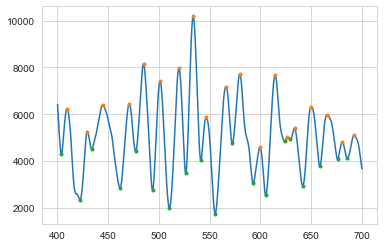

In [35]:
def locex(X):
    maxx = []
    tmax = []
    minn = []
    tmin = []
    for i in range(len(X) - 2):
        if ((X[i+1] > X[i]) and (X[i+1] > X[i+2])):
            maxx.append(X[i+1])
            tmax.append(i+1)
        if ((X[i+1] < X[i]) and (X[i+1] < X[i+2])):
            minn.append(X[i+1])
            tmin.append(i+1)
    return maxx, tmax, minn, tmin
            
smooring = sliceArray(mooring, t, 400, 700)
stime = sliceArray(t, t, 400, 700)
maxx, tmaxind, minn, tminind = locex(smooring)
tmax = []
tmin = []
for i in range(len(tmaxind)):
    tmax.append(stime[tmaxind[i]])
for i in range(len(tminind)):
    tmin.append(stime[tminind[i]])

plt.plot(stime, smooring,'-')
plt.plot(tmax, maxx, '.')
plt.plot(tmin, minn, '.')


In [37]:
maxx, tmax, minn, tmin = locex(mooring)
print('Local Max =', maxx)
print('Local Min =', minn)

Local Max = [7515.09, 5672.46, 5775.28, 8395.55, 6208.28, 7442.05, 5367.41, 5303.48, 5332.21, 7171.48, 8245.2, 6273.93, 6659.96, 5538.92, 5035.37, 6392.78, 6820.1, 6573.77, 5422.92, 6445.9, 4725.3, 5061.98, 6136.66, 4825.12, 6064.9, 8003.91, 5962.3, 7912.96, 6243.23, 5261.47, 6400.02, 6454.54, 8156.73, 7413.21, 7965.25, 10186.5, 5875.08, 7186.95, 7726.79, 4597.8, 7672.57, 5010.8, 5407.66, 6329.94, 5969.62, 4830.17, 5111.11, 6096.05, 5852.29, 5672.42, 7387.99, 6847.52, 5768.24, 7132.48, 6104.29, 8667.71, 7807.91, 6646.14, 5339.3, 6759.68, 5590.38, 5650.02, 5743.26, 7297.33, 7390.65, 5447.05, 6810.36, 6695.85, 5234.27, 6831.79, 5477.16, 4196.92, 6957.05, 6174.31, 5976.76, 5528.69, 6144.07, 6340.75, 7187.72, 5720.08, 5370.53, 5637.52, 5637.46, 5292.68, 7035.68, 6328.21, 7340.85, 8453.13, 8862.79, 4572.15, 3751.37, 3871.85, 7292.65, 6493.81, 5945.8, 8242.21, 5148.42, 7399.45, 7307.66, 5427.7, 5439.75, 8725.98, 9101.68, 5499.94, 6383.5, 5213.52, 4733.13, 6349.9, 8448.89, 5284.7, 4671.55, 68

In [38]:
print(t[tmax[0]])
print(t[tmin[0]])

0.7
9.0


7972.78
248 247


(array([  5.,  62.,  76., 103.,  94.,  72.,  44.,  29.,   8.,   1.]),
 array([-994.78 ,  -98.024,  798.732, 1695.488, 2592.244, 3489.   ,
        4385.756, 5282.512, 6179.268, 7076.024, 7972.78 ]),
 <BarContainer object of 10 artists>)

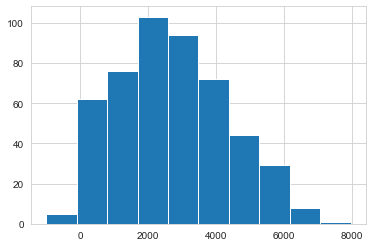

In [39]:
diff = []
if len(maxx) > len(minn):
    for i in range(len(minn)):
        diff.append(maxx[i] - minn[i])
        diff.append(maxx[i+1] - minn[i])
elif len(maxx) < len(minn):
    for i in range(len(maxx)):
        diff.append(maxx[i] - minn[i])
        diff.append(maxx[i] - minn[i+1])
else:
    if t[tmax[0]] < t[tmin[0]]:
        for i in range(len(maxx)-1):
            diff.append(maxx[i] - minn[i])
            diff.append(maxx[i+1] - minn[i])
        diff.append(maxx[i+1] - minn[i+1])
    else:
        for i in range(len(maxx)-1):
            diff.append(maxx[i] - minn[i])
            diff.append(maxx[i] - minn[i+1])
        diff.append(maxx[i+1] - minn[i+1])
        
print(max(diff))
print(len(maxx), len(minn))
plt.hist(diff, bins = 10)

In [13]:
def minthick(tm):
    Dout = 10
    val1 = (tm*10**3*Dout*64)/(345*10**6*np.pi)
    val2 = Dout**4 - val1
    val3 = val2**(1/4)
    t = (1/2)*(Dout - val3)
    return t

tm = np.max(np.abs(towerMom))
print(tm)
print(minthick(tm))

1327809.46
0.10102788019764652
